In [1]:
# pip install rawpy

In [6]:
import rawpy
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5, 10
from matplotlib.pyplot import imshow

In [3]:
raw = rawpy.imread("../02_lights_milky-way-15s/UI8A09838.CR2")

In [5]:
raw.white_level

13584

In [6]:
raw.black_level_per_channel

[2051, 2051, 2051, 2051]

In [7]:
raw.camera_white_level_per_channel

[15237, 15237, 15237, 15237]

In [8]:
raw.camera_whitebalance

[1524.0, 1024.0, 2217.0, 1024.0]

In [9]:
raw.color_desc

b'RGBG'

In [31]:
color_matrix = raw.color_matrix

In [32]:
%whos

Variable               Type       Data/Info
-------------------------------------------
color_matrix           ndarray    3x4: 12 elems, type `float32`, 48 bytes
dcraw_make_mem_image   ndarray    5496x3670x3: 60510960 elems, type `uint8`, 60510960 bytes (57.70774841308594 Mb)
raw                    RawPy      <rawpy._rawpy.RawPy object at 0x7f7a5bd9a340>
raw_colors_visible     ndarray    3670x5496: 20170320 elems, type `uint8`, 20170320 bytes (19.235916137695312 Mb)
rawpy                  module     <module 'rawpy' from '/op<...>kages/rawpy/__init__.py'>


In [12]:
raw.daylight_whitebalance

[2.0960230827331543, 0.9293776750564575, 1.3153496980667114, 0.0]

In [29]:
dcraw_make_mem_image = raw.dcraw_make_mem_image()

In [18]:
raw.dcraw_process()

In [4]:
# raw.extract_thumb()

In [22]:
raw.num_colors

3

In [28]:
raw_colors_visible = raw.raw_colors_visible

In [33]:
extract_thumb = raw.extract_thumb()

In [34]:
raw.raw_image

array([[2044, 2046, 2049, ..., 2042, 2054, 2046],
       [2056, 2051, 2050, ..., 2041, 2044, 2048],
       [2045, 2038, 2054, ..., 2044, 2054, 2049],
       ...,
       [2069, 2032, 2086, ..., 2239, 2152, 2150],
       [2101, 2031, 2062, ..., 2130, 2103, 2261],
       [2446, 2392, 2391, ..., 2624, 2579, 2536]], dtype=uint16)

In [35]:
raw_image = raw.raw_image

In [36]:
raw.raw_image_visible

array([[2043, 2077, 2183, ..., 2152, 2132, 2212],
       [2053, 2072, 2096, ..., 2138, 2140, 2249],
       [2029, 2043, 2066, ..., 2189, 2157, 2230],
       ...,
       [3096, 2393, 3093, ..., 2239, 2152, 2150],
       [2594, 3197, 2558, ..., 2130, 2103, 2261],
       [3364, 2717, 3342, ..., 2624, 2579, 2536]], dtype=uint16)

In [37]:
raw_image_visible = raw.raw_image_visible

In [38]:
raw.raw_pattern

array([[0, 1],
       [1, 2]], dtype=uint8)

In [39]:
raw.raw_type

<RawType.Flat: 0>

In [43]:
raw.raw_value_visible()

TypeError: raw_value_visible() takes exactly 2 positional arguments (0 given)

In [46]:
help(raw.raw_value_visible)

Help on built-in function raw_value_visible:

raw_value_visible(...) method of rawpy._rawpy.RawPy instance
    RawPy.raw_value_visible(self, int row, int column) -> ushort
    
    Return RAW value at given position relative to visible area of image.
    Only usable for flat RAW images (see :attr:`~rawpy.RawPy.raw_type` property).



In [49]:
help(raw.dcraw_process)

Help on built-in function dcraw_process:

dcraw_process(...) method of rawpy._rawpy.RawPy instance
    RawPy.dcraw_process(self, params=None, **kw)
    
    Postprocess the currently loaded RAW image.
    
    .. NOTE:: This is a low-level method, consider using :meth:`~rawpy.RawPy.postprocess` instead.
    
    :param rawpy.Params params: 
        The parameters to use for postprocessing.
    :param **kw: 
        Alternative way to provide postprocessing parameters.
        The keywords are used to construct a :class:`rawpy.Params` instance.
        If keywords are given, then `params` must be omitted.



In [50]:
raw.rgb_xyz_matrix

array([[ 0.7268, -0.1082, -0.0969],
       [-0.4186,  1.1839,  0.2663],
       [-0.0825,  0.2029,  0.5839],
       [ 0.    ,  0.    ,  0.    ]], dtype=float32)

In [51]:
raw.sizes

ImageSizes(raw_height=3708, raw_width=5568, height=3670, width=5496, top_margin=38, left_margin=72, iheight=3670, iwidth=5496, pixel_aspect=1.0, flip=5)

In [52]:
raw.tone_curve

array([    0,     1,     2, ..., 65533, 65534, 65535], dtype=uint16)

In [53]:
raw.white_level

13584

In [3]:
%whos

Variable   Type      Data/Info
------------------------------
raw        RawPy     <rawpy._rawpy.RawPy object at 0x7f7c56f99640>
rawpy      module    <module 'rawpy' from '/op<...>kages/rawpy/__init__.py'>


In [5]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1), no_auto_bright=True, output_bps=16) # a numpy RGB array
#image = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR) # the OpenCV image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


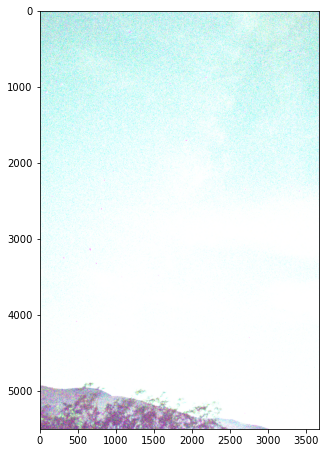

In [7]:
imshow(rgb)

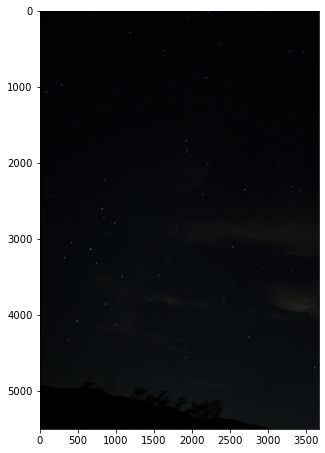

In [8]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1), no_auto_bright=True) # a numpy RGB array
imshow(rgb)

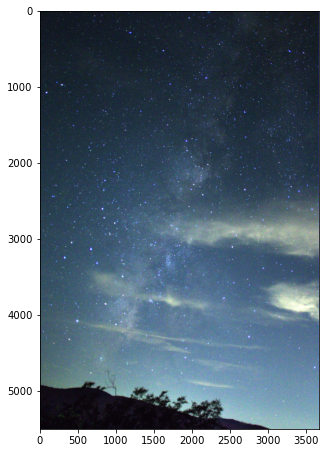

In [9]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1)) # a numpy RGB array
imshow(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


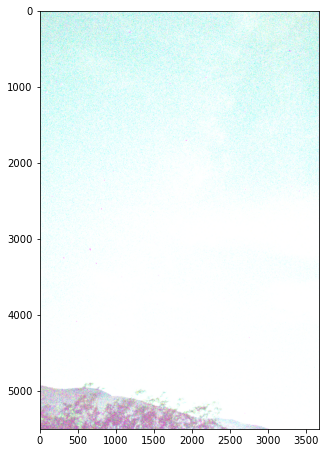

In [10]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1), output_bps=16) # a numpy RGB array
imshow(rgb)

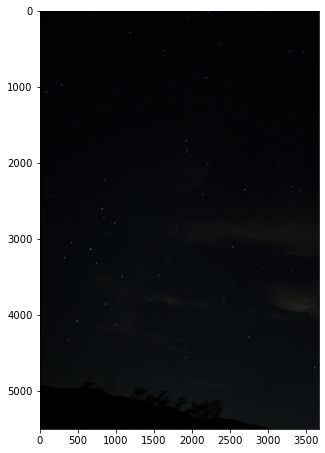

In [11]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1), no_auto_bright=True, output_bps=8) # a numpy RGB array
imshow(rgb)

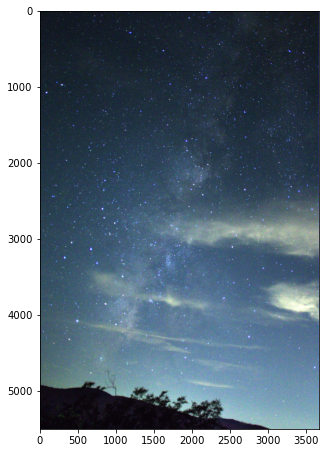

In [12]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1),output_bps=8) # a numpy RGB array
imshow(rgb)

In [13]:
import imageio

In [14]:
imageio.imsave('default.tiff', rgb)

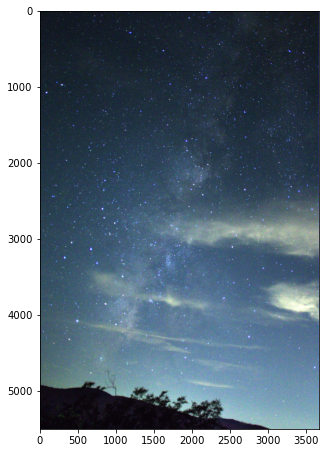

In [15]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,1)) # a numpy RGB array
imshow(rgb)

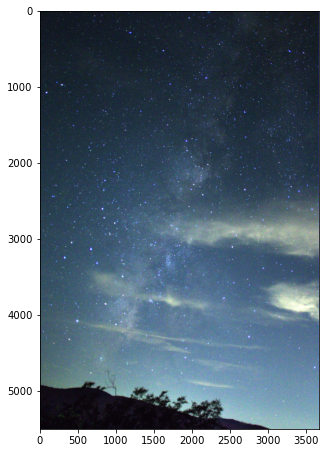

In [16]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(1,0)) # a numpy RGB array
imshow(rgb)

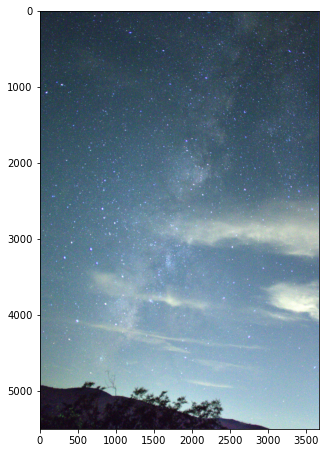

In [19]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(2,2)) # a numpy RGB array
imshow(rgb)

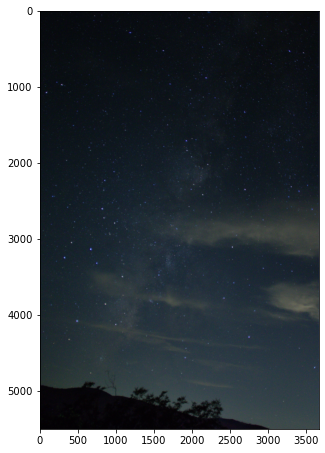

In [25]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(4,4), no_auto_bright=True) # a numpy RGB array
imshow(rgb)

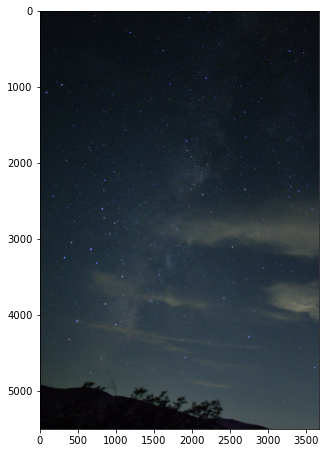

In [26]:
rgb = raw.postprocess(use_camera_wb=True, gamma=(5,5), no_auto_bright=True) # a numpy RGB array
imshow(rgb)

In [27]:
imageio.imsave('default_gamma-5-5.tiff', rgb)

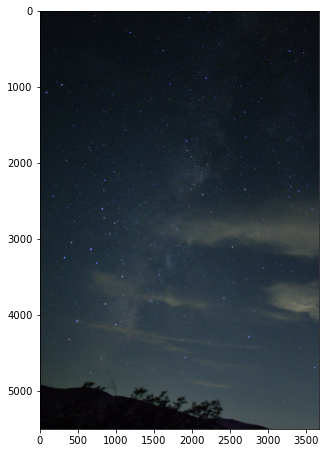

In [28]:
rgb = raw.postprocess(demosaic_algorithm=None, use_camera_wb=True, gamma=(5,5), no_auto_bright=True) # a numpy RGB array
imshow(rgb)

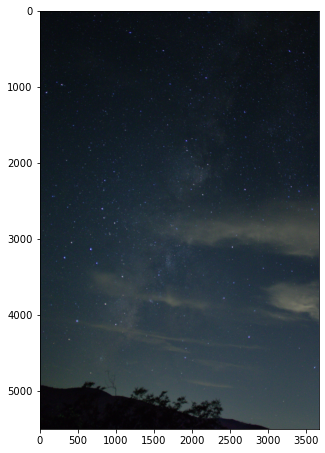

In [32]:
rgb = raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR
                      , use_camera_wb=True, gamma=(5,5), no_auto_bright=True) # a numpy RGB array
imshow(rgb)
imageio.imsave('default_gamma-5-5_linear.tiff', rgb)

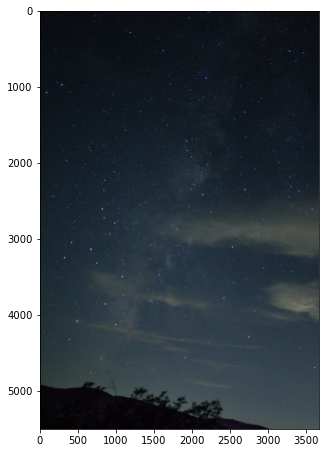

In [33]:
rgb = raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.PPG
                      , use_camera_wb=True, gamma=(5,5), no_auto_bright=True) # a numpy RGB array
imshow(rgb)
imageio.imsave('default_gamma-5-5_ppg.tiff', rgb)

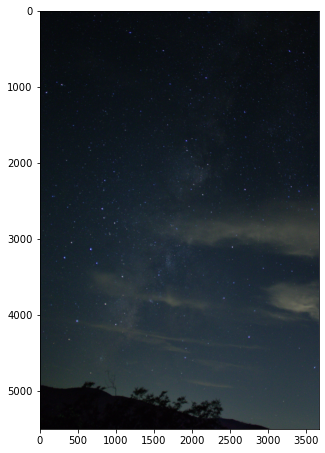

In [34]:
rgb = raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR
                      , use_camera_wb=True, gamma=(4,4), no_auto_bright=True) # a numpy RGB array
imshow(rgb)
imageio.imsave('default_gamma-4-4_linear.tiff', rgb)

In [35]:
#https://github.com/search?q=rawpy+postprocess&type=code

In [36]:
rgb = raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.AMAZE
                      , use_camera_wb=True, gamma=(4,4), no_auto_bright=True) # a numpy RGB array
imshow(rgb)
imageio.imsave('default_gamma-4-4_amaze.tiff', rgb)

NotSupportedError: Demosaic algorithm AMAZE requires GPL3 demosaic pack

In [37]:
#https://www.libraw.org/docs/Install-LibRaw-eng.html

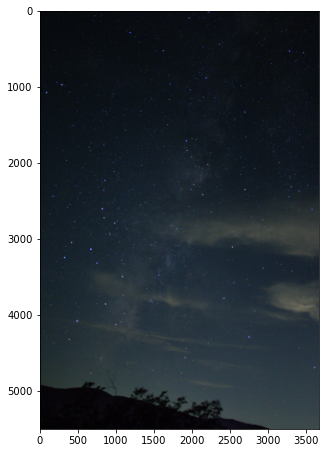

In [38]:
rgb = raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.DCB
                      , use_camera_wb=True, gamma=(4,4), no_auto_bright=True) # a numpy RGB array
imshow(rgb)
imageio.imsave('default_gamma-4-4_DCB.tiff', rgb)